## Exploratory Data Analisys
Izquierda Diario

### Load tokens
"izquierda diario" tokens

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
tokens = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')

### Tf IDf Scores

#### TfIDf Transformation

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
tfidf_inf = TfidfTransformer().fit_transform(tokens[tokens.topics == 'inflation'].drop('topics', axis=1))

In [5]:
tfidf_inf_df = pd.DataFrame(tfidf_inf.todense(), columns = tokens[tokens.topics == 'inflation'].drop('topics', axis=1).columns)

In [6]:
tfidf_ex = TfidfTransformer().fit_transform(tokens[tokens.topics == 'exchange'].drop('topics', axis=1))

In [7]:
tfidf_ex_df = pd.DataFrame(tfidf_ex.todense(), columns = tokens[tokens.topics == 'exchange'].drop('topics', axis=1).columns)

### Visual Representation
#### Tf IDf per document
See top rated terms per document and their scores

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['figure.figsize'] = [20 , 35]

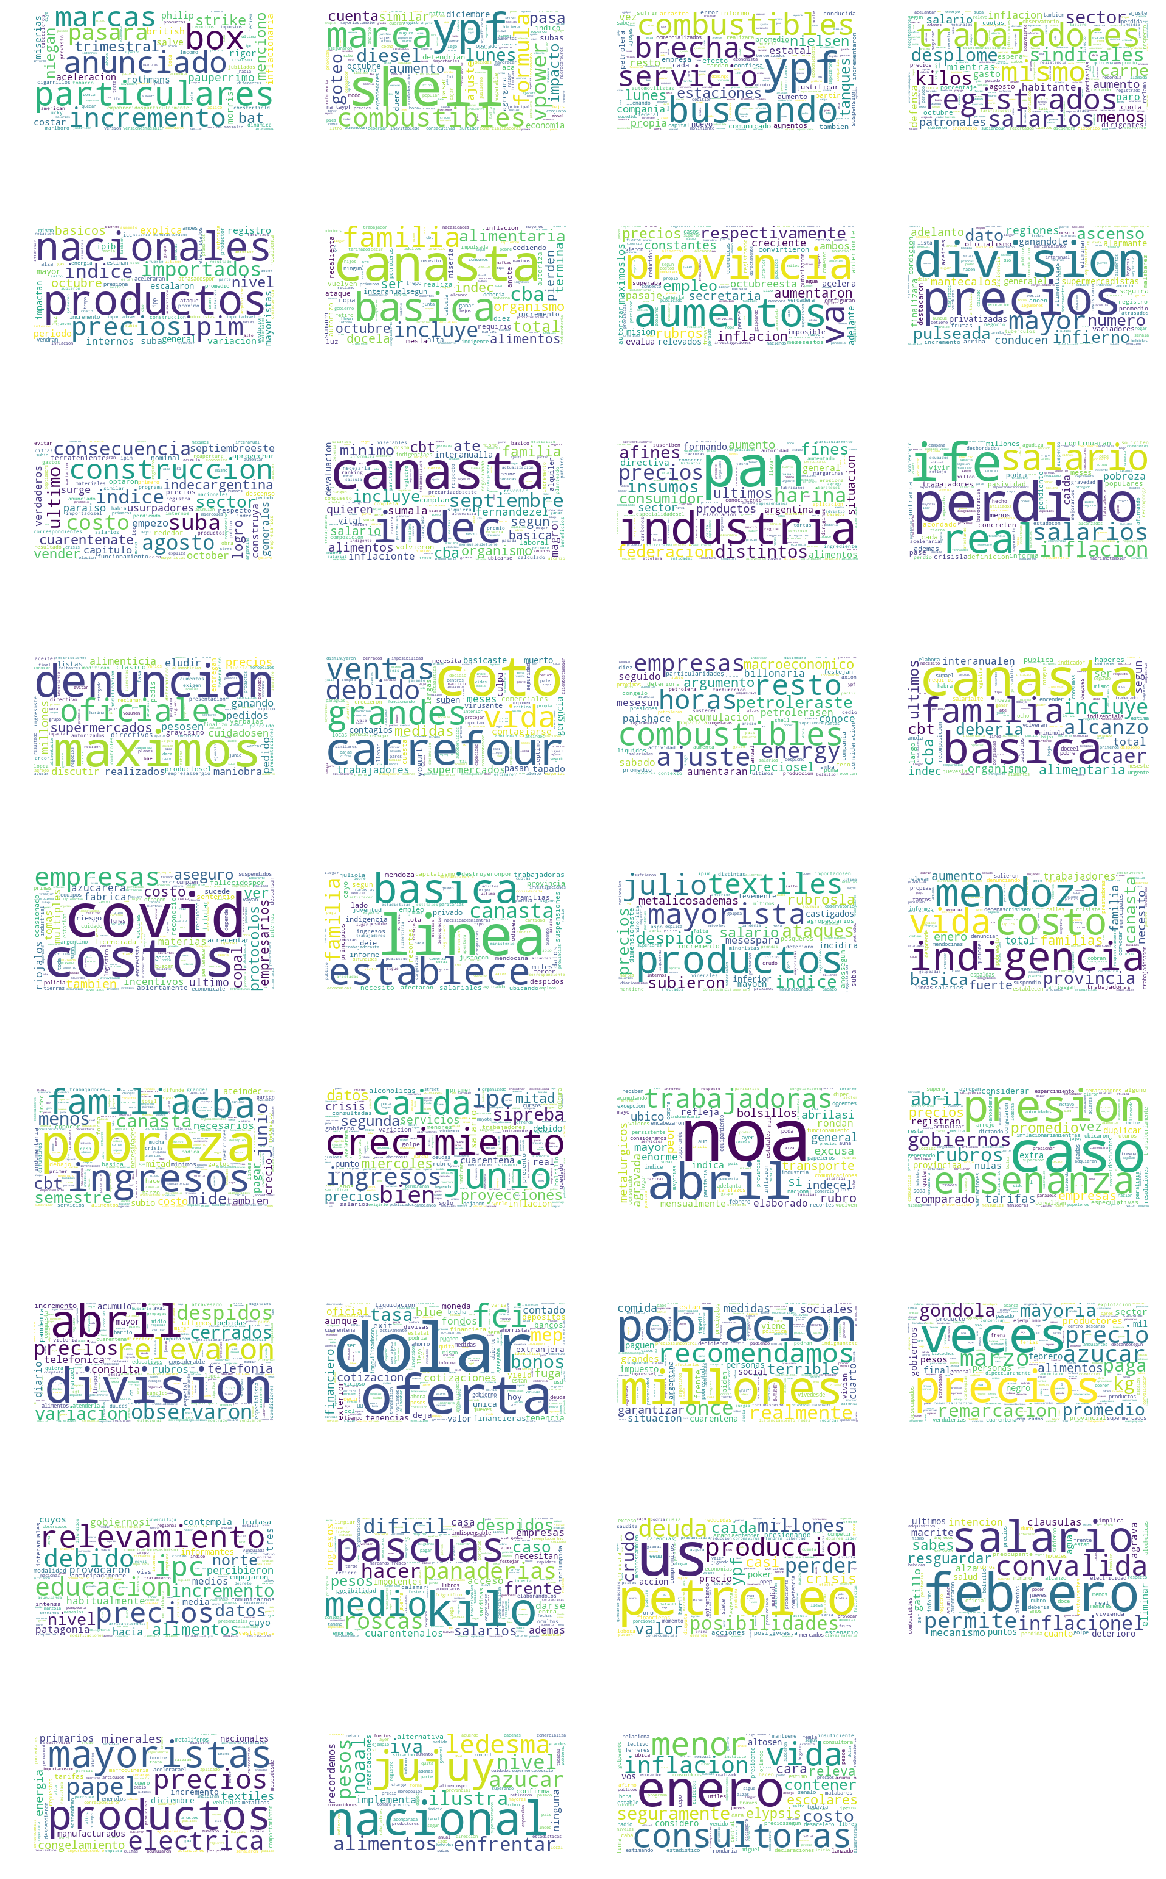

In [10]:
for row in range(tfidf_inf_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_inf_df.iloc[row].sort_values())
    plt.subplot(9, 4, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

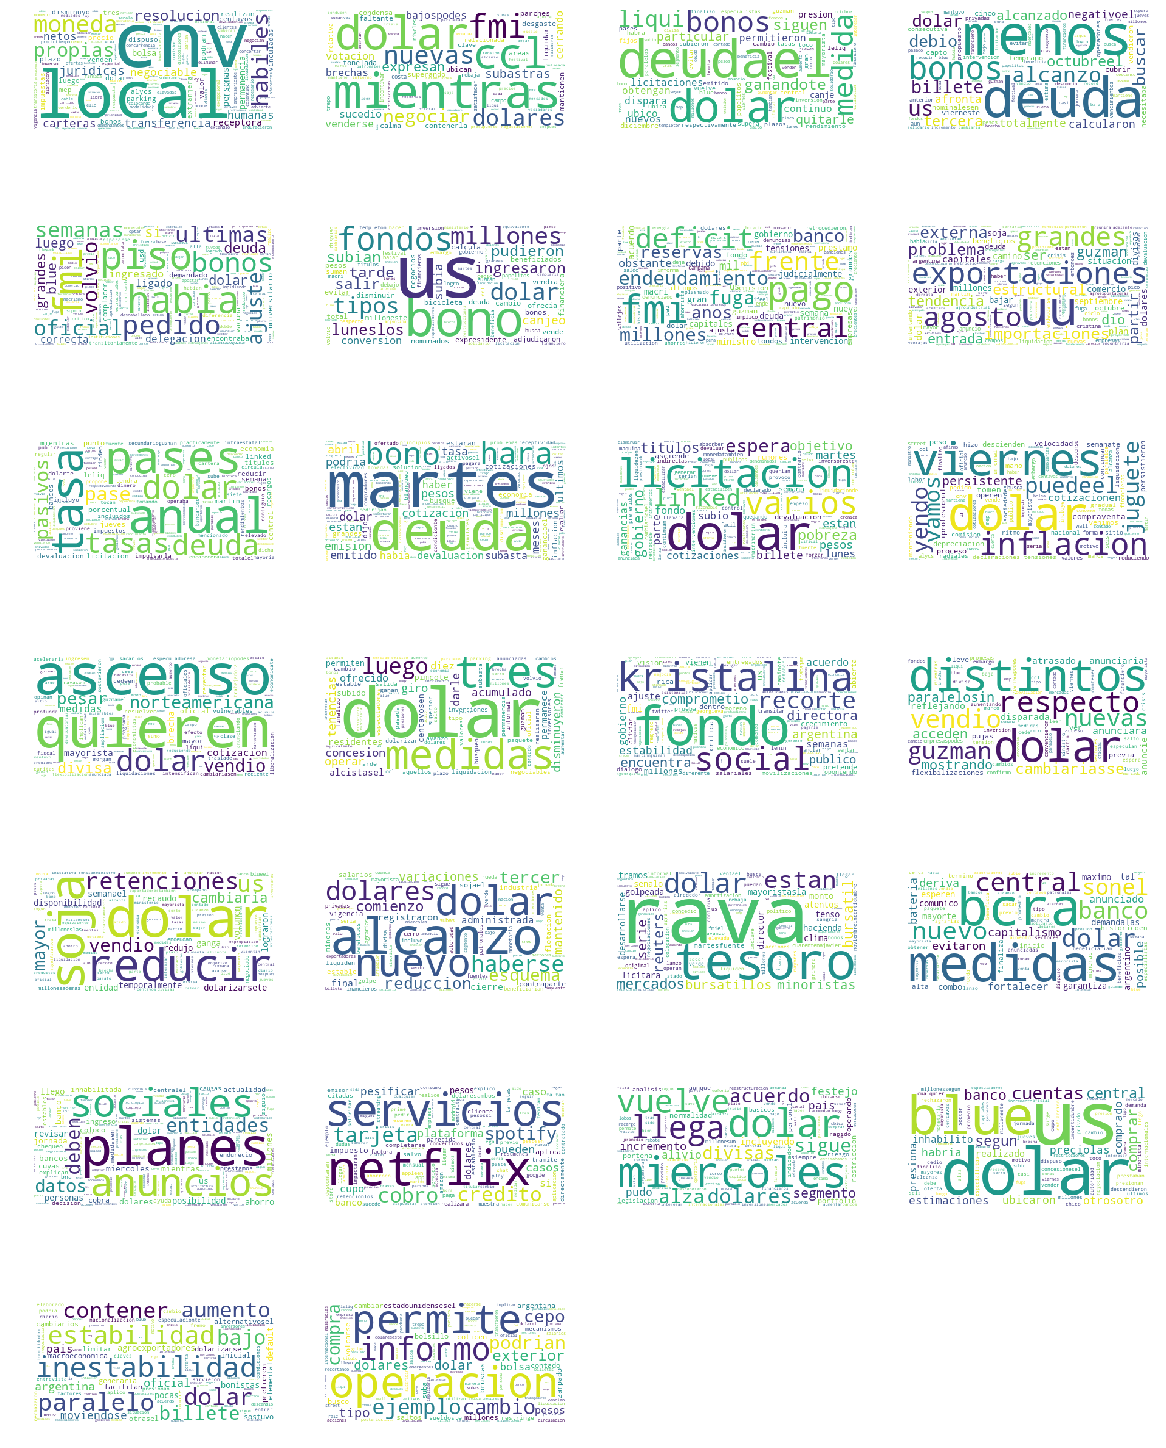

In [11]:
for row in range(tfidf_ex_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_ex_df.iloc[row].sort_values())
    plt.subplot(9, 4, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

#### Tf IDf per topic
See top rated terms amid documents of the same topic

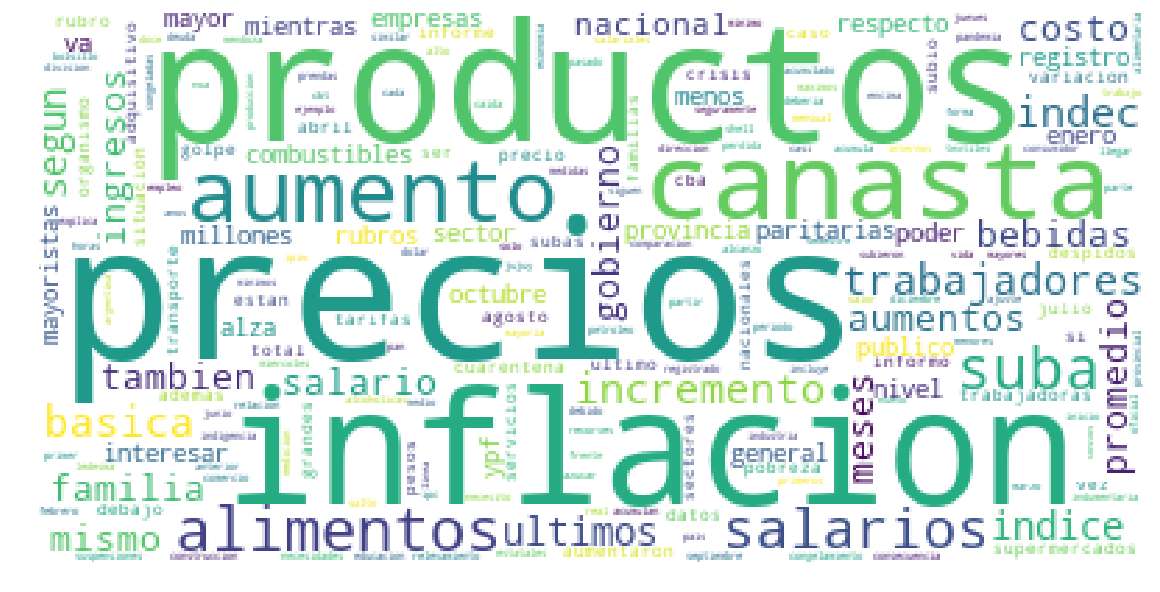

In [12]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_inf_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.show()

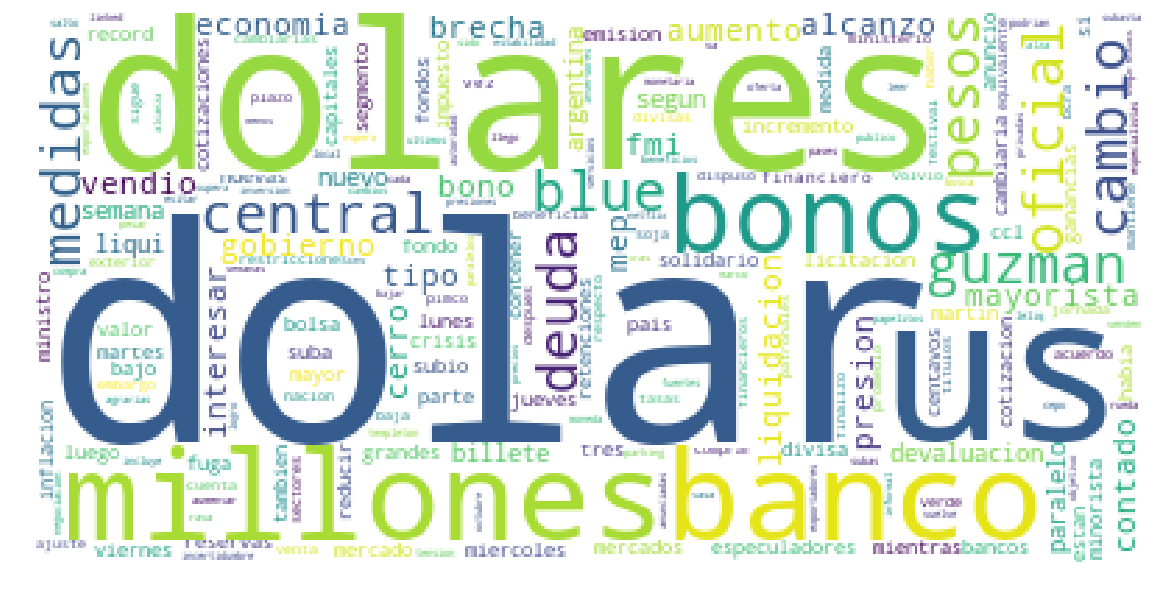

In [13]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_ex_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Combinations

In [14]:
tfidf = TfidfTransformer().fit_transform(tokens.drop('topics', axis=1))
tfidf_df = pd.DataFrame(tfidf.todense(), columns = tokens.drop('topics', axis=1).columns)

In [15]:
tfidf_df.index = ['inf'+ str(i) for i in range(len(tokens[tokens.topics == 'inflation']))] + ['ex'+ str(i) for i in range(len(tokens[tokens.topics == 'exchange']))]

In [16]:
n_inf_news = len(tokens[tokens.topics == 'inflation'])

### SVD

In [17]:
from sklearn.decomposition import TruncatedSVD

In [18]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(tfidf_df)
P = np.around(p,3)

#### Plot

In [19]:
import plotly.graph_objects as go

In [20]:
labels = tfidf_df.index.tolist()

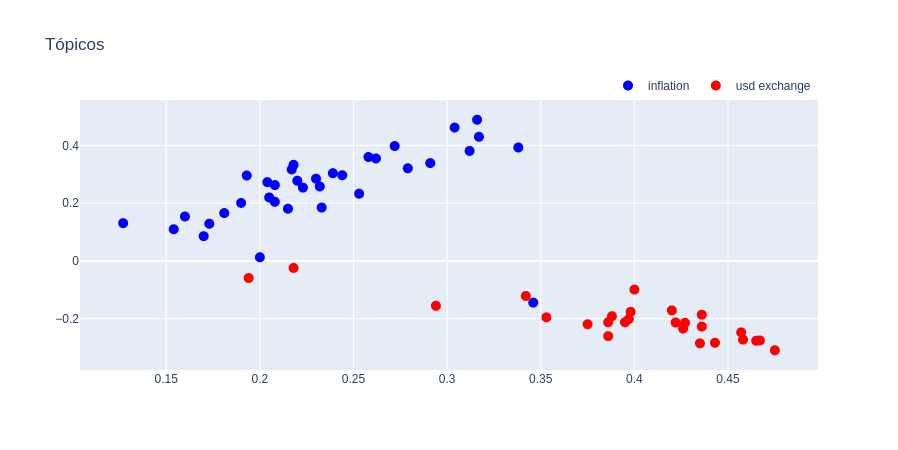

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = P[:n_inf_news, 0], y = P[:n_inf_news, 1],
    mode ='markers',
    text = labels[:n_inf_news],
    marker = dict(
        size = 10,
        color = 'blue',
    ),
    name='inflation',
    )
)

fig.add_trace(go.Scatter(
    x = P[n_inf_news:,0], y = P[n_inf_news:,1],
    mode ='markers',
    text = labels[n_inf_news:],
    marker = dict(
        size = 10,
        color = 'red',
    ),
    name='usd exchange',
    )
)

fig.update_layout(title='Tópicos', 
                  xaxis_zeroline=True,
                  legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=1,
                        xanchor="right",
                        x=1
                  )
)

fig.update_layout(title='Tópicos', xaxis_zeroline=True)

fig.show()

In [22]:
comp1, comp2 = svd.components_

In [23]:
indices1 = np.argsort(comp1)

In [24]:
indices1 = indices1[::-1]
indices1[:20]

array([1013, 1015, 3107, 2386, 1960,  331,  378,  368, 2132,  293, 1452,
        505, 1592,  441,  692,  930, 2310,  453, 1417, 2467])

In [25]:
indices2 = np.argsort(comp2)
indices2 = indices2[::-1]

In [26]:
indices2[:20]

array([2386,  453, 2467,  147, 1568, 1592,  343, 2764, 3038, 1292, 2880,
       1574, 2763,  352, 3094, 2227, 2651,  294, 1985, 1936])

In [27]:
dim1 = np.array(tfidf_df.columns)[indices1]
print(f'Dimensión 1:\n{dim1[:50]}')

Dimensión 1:
['dolar' 'dolares' 'us' 'precios' 'millones' 'banco' 'bonos' 'blue'
 'oficial' 'aumento' 'guzman' 'central' 'inflacion' 'cambio' 'contado'
 'deuda' 'pesos' 'canasta' 'gobierno' 'productos' 'suba' 'mayorista'
 'medidas' 'mep' 'brecha' 'segun' 'incremento' 'alimentos' 'tipo'
 'liquidacion' 'interesar' 'economia' 'salarios' 'trabajadores' 'indec'
 'alcanzo' 'presion' 'cerro' 'mayor' 'bono' 'ultimos' 'vendio' 'basica'
 'mientras' 'devaluacion' 'tambien' 'mercado' 'semana' 'billete' 'mismo']


In [28]:
dim2 = np.array(tfidf_df.columns)[indices2]
print(f'Dimensión 2:\n{dim2[:50]}')

Dimensión 2:
['precios' 'canasta' 'productos' 'alimentos' 'indec' 'inflacion' 'basica'
 'salarios' 'trabajadores' 'familia' 'suba' 'indice' 'salario' 'bebidas'
 'ultimos' 'paritarias' 'registro' 'aumentos' 'mismo' 'meses' 'cba'
 'aumento' 'ingresos' 'incremento' 'provincia' 'alza' 'mayoristas' 'cbt'
 'rubros' 'segun' 'alimentaria' 'respecto' 'julio' 'adquisitivo'
 'organismo' 'ser' 'total' 'costo' 'necesito' 'publico' 'transporte'
 'nivel' 'variacion' 'nacionales' 'agosto' 'general' 'enero'
 'trabajadoras' 'menores' 'poder']


### PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2).fit(tfidf_df)
pca_tfidf = pca.transform(tfidf_df)

#### Plot

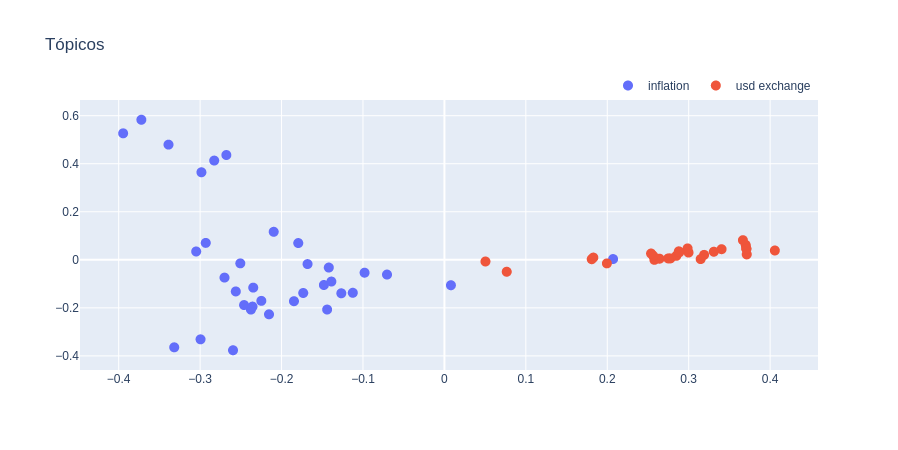

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = pca_tfidf[:n_inf_news, 0], y = pca_tfidf[:n_inf_news, 1],
    mode ='markers',
    textposition="middle left",
    text = labels[:n_inf_news + 1],
    marker = dict(
        size = 10,
    ),
    name='inflation'
))
fig.add_trace(go.Scatter(
    x = pca_tfidf[n_inf_news:,0], y = pca_tfidf[n_inf_news:,1],
    mode ='markers',
    text = labels[n_inf_news:],
    marker = dict(
        size = 10,
    ),
    name='usd exchange'
))

fig.update_layout(title='Tópicos', 
                  xaxis_zeroline=True,
                  legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=1,
                        xanchor="right",
                        x=1
                  )
)

fig.show()

In both linear combinations, document num 25 appears far away from the group of articles about inflation.

In [32]:
tokens.drop('topics', axis=1).iloc[25].sort_values(ascending=False)[:20]

dolar           8
oferta          6
oficial         4
fci             4
tasa            3
gobierno        3
bonos           3
contado         3
aunque          3
valor           3
cotizacion      3
cotizaciones    3
mismo           3
financiero      3
fuga            3
mep             3
blue            3
fondos          3
brecha          2
pueden          2
Name: doc26, dtype: int64

In [40]:
data = pickle.load(open('data/df_clean_izq.pkl','rb'))
data.iloc[25].flyer

'SUBA SIN FRENO'

In [41]:
data.iloc[25].headline

'¿Qué pasa con el dólar financiero?'

Article num 25 was clearly wrong classified.

In [44]:
data.drop(index=25, axis=0, inplace=True)

In [45]:
data.reset_index(drop=True, inplace=True)

In [47]:
pickle.dump(data, open( "data/df_clean_izq.pkl", "wb" ))